In [1]:
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
%matplotlib inline
sns.colorcodes = True

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from imblearn.over_sampling import SMOTE
from scipy.stats import zscore
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import cross_validate, cross_val_predict, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# ANOVA feature selection for numeric input and categorical output
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

import folium
from folium import plugins
from folium.plugins import HeatMap
from folium.plugins import MarkerCluster

from sklearn.tree import DecisionTreeRegressor


import warnings
warnings.filterwarnings('ignore')

In [2]:
from lazypredict.Supervised import LazyRegressor

In [3]:
df=pd.read_csv("innercity.csv")

In [4]:
df.isna().sum()

cid                 0
dayhours            0
price               0
room_bed            0
room_bath           0
living_measure      0
lot_measure         0
ceil                0
coast               0
sight               0
condition           0
quality             0
ceil_measure        0
basement            0
yr_built            0
yr_renovated        0
zipcode             0
lat                 0
long                0
living_measure15    0
lot_measure15       0
furnished           0
total_area          0
dtype: int64

In [5]:
df.columns

Index(['cid', 'dayhours', 'price', 'room_bed', 'room_bath', 'living_measure',
       'lot_measure', 'ceil', 'coast', 'sight', 'condition', 'quality',
       'ceil_measure', 'basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'living_measure15', 'lot_measure15', 'furnished',
       'total_area'],
      dtype='object')

In [6]:
df.drop(columns=['cid','dayhours'],inplace = True)

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,21613.00,540182.16,367362.23,75000.00,321950.00,450000.00,645000.00,7700000.00
room_bed,21613.00,3.37,0.93,0.00,3.00,3.00,4.00,33.00
room_bath,21613.00,2.11,0.77,0.00,1.75,2.25,2.50,8.00
living_measure,21613.00,2079.90,918.44,290.00,1427.00,1910.00,2550.00,13540.00
lot_measure,21613.00,15106.97,41420.51,520.00,5040.00,7618.00,10688.00,1651359.00
ceil,21613.00,1.49,0.54,1.00,1.00,1.50,2.00,3.50
coast,21613.00,0.01,0.09,0.00,0.00,0.00,0.00,1.00
sight,21613.00,0.23,0.77,0.00,0.00,0.00,0.00,4.00
condition,21613.00,3.41,0.65,1.00,3.00,3.00,4.00,5.00
quality,21613.00,7.66,1.18,1.00,7.00,7.00,8.00,13.00


In [8]:
df.corr()

,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,condition,quality,...,basement,yr_built,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area
price,1.00,0.31,0.53,0.70,0.09,0.26,0.27,0.40,0.04,0.67,...,0.32,0.05,0.13,-0.05,0.31,0.02,0.59,0.08,0.57,0.10
room_bed,0.31,1.00,0.52,0.58,0.03,0.18,-0.01,0.08,0.03,0.36,...,0.30,0.15,0.02,-0.15,-0.01,0.13,0.39,0.03,0.26,0.04
room_bath,0.53,0.52,1.00,0.75,0.09,0.50,0.06,0.19,-0.12,0.66,...,0.28,0.51,0.05,-0.20,0.02,0.22,0.57,0.09,0.48,0.10
living_measure,0.70,0.58,0.75,1.00,0.17,0.35,0.10,0.28,-0.06,0.76,...,0.44,0.32,0.06,-0.20,0.05,0.24,0.76,0.18,0.63,0.19
lot_measure,0.09,0.03,0.09,0.17,1.00,-0.01,0.02,0.07,-0.01,0.11,...,0.02,0.05,0.01,-0.13,-0.09,0.23,0.14,0.72,0.12,1.00
ceil,0.26,0.18,0.50,0.35,-0.01,1.00,0.02,0.03,-0.26,0.46,...,-0.25,0.49,0.01,-0.06,0.05,0.13,0.28,-0.01,0.35,0.00
coast,0.27,-0.01,0.06,0.10,0.02,0.02,1.00,0.40,0.02,0.08,...,0.08,-0.03,0.09,0.03,-0.01,-0.04,0.09,0.03,0.07,0.02
sight,0.40,0.08,0.19,0.28,0.07,0.03,0.40,1.00,0.05,0.25,...,0.28,-0.05,0.10,0.08,0.01,-0.08,0.28,0.07,0.22,0.08
condition,0.04,0.03,-0.12,-0.06,-0.01,-0.26,0.02,0.05,1.00,-0.14,...,0.17,-0.36,-0.06,0.00,-0.01,-0.11,-0.09,-0.00,-0.12,-0.01
quality,0.67,0.36,0.66,0.76,0.11,0.46,0.08,0.25,-0.14,1.00,...,0.17,0.45,0.01,-0.18,0.11,0.20,0.71,0.12,0.79,0.13


In [9]:
df['price'].mean()

540182.1587933188

Text(0.5, 1, 'PEARSON CORRELATION')

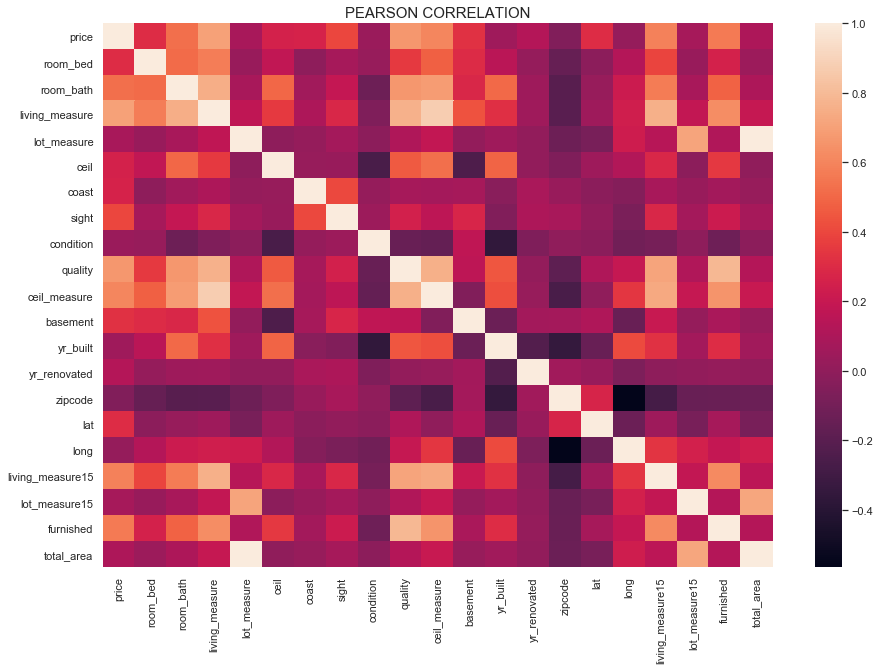

In [10]:
plt.figure(figsize = (15,10))
sns.heatmap(df.corr(method="pearson"))
plt.title('PEARSON CORRELATION', fontsize=15)

In [11]:
df.shape

(21613, 21)

## MAP - To be added to Master Jupyter

import folium
from folium import plugins
from folium.plugins import HeatMap
from folium.plugins import MarkerCluster

def get_center_coordinates(df):
    # get the central coordinates for the map
    centerlat = df['lat'].mean()
    centerlong = df['long'].mean()
    return centerlat, centerlong


#Plain Map - Without plotting the House details. 
center = get_center_coordinates(df)
# create a new map object
m = folium.Map(location=center, zoom_start=8)
m

m = folium.Map(location=center, zoom_start=9.5)
# go through each home in set, make circle, and add to map.
for i in range(len(df)):
    folium.Circle(
        location=[df.iloc[i]['lat'], df.iloc[i]['long']],
        radius=2,color='purple', opacity=0.2, popup='Seattle, OR'
    ).add_to(m)
##Display map
m

### PRICE HISTOGRAM ##To be added to Master Jupyter##

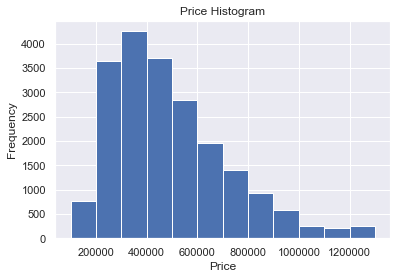

In [12]:
### plot 'price' histogram
bins = np.array([100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300]) * 1000
plt.hist(x=df['price'],bins=bins)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Price Histogram')
plt.show()

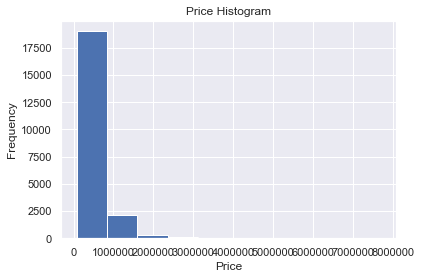

In [13]:
plt.hist(x=df['price'])
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Price Histogram')
plt.show()

In [14]:
X = df.drop(columns = ['price'],axis = 1)
y = df['price']

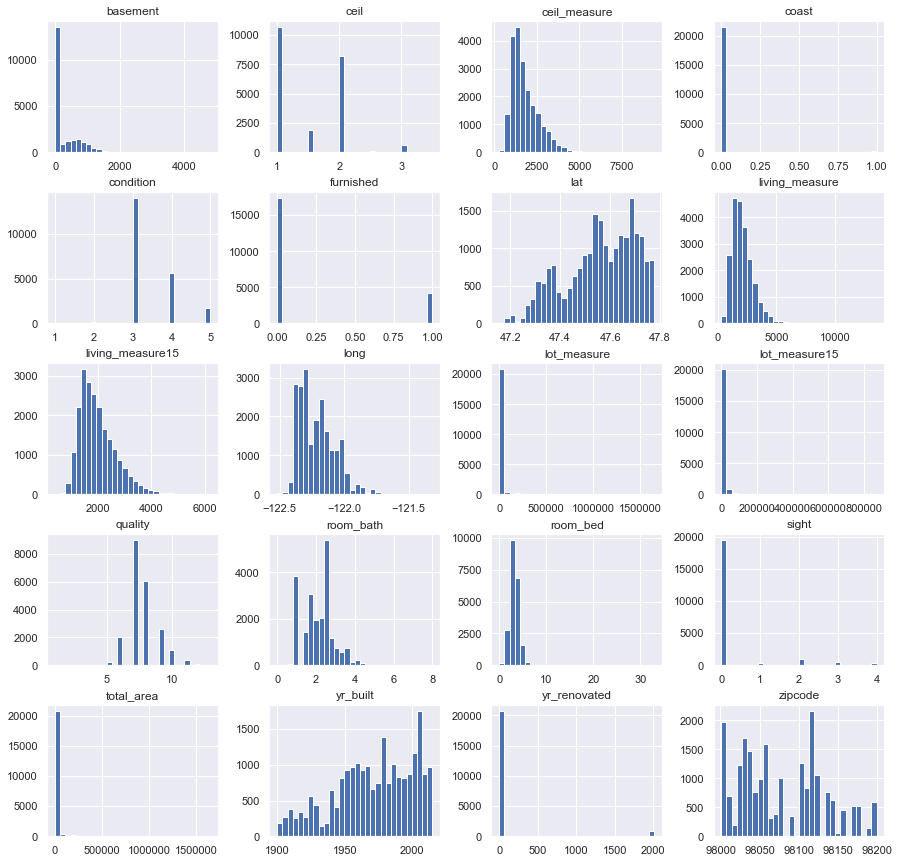

In [15]:
X.hist(figsize  = [15, 15],bins=30) 
plt.show()

VIF - Checking for Multicollinearity

In [16]:
vif_cols = X

In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data=pd.DataFrame()
vif_data['Feature']=vif_cols.columns

In [18]:
vif_data

,Feature
0,room_bed
1,room_bath
2,living_measure
3,lot_measure
4,ceil
5,coast
6,sight
7,condition
8,quality
9,ceil_measure


In [19]:
vif_data['VIF']=[variance_inflation_factor(vif_cols.values,i)
                        for i in range(len(vif_cols.columns))]

In [20]:
x=vif_data['VIF'].astype(str)

In [21]:
vif_data  #VIF Before handling any data anamolies

,Feature,VIF
0,room_bed,23.36
1,room_bath,28.80
2,living_measure,inf
3,lot_measure,inf
4,ceil,16.89
5,coast,1.21
6,sight,1.55
7,condition,34.75
8,quality,210.24
9,ceil_measure,inf


In [22]:
df.head()

,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,condition,quality,...,basement,yr_built,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area
0,808100,4,3.25,3020,13457,1.00,0,0,5,9,...,0,1956,0,98133,47.72,-122.34,2120,7553,1,16477
1,277500,4,2.50,2550,7500,1.00,0,0,3,8,...,800,1976,0,98023,47.32,-122.39,2260,8800,0,10050
2,404000,3,2.50,2370,4324,2.00,0,0,3,8,...,0,2006,0,98038,47.35,-122.00,2370,4348,0,6694
3,300000,2,1.00,820,3844,1.00,0,0,4,6,...,0,1916,0,98133,47.70,-122.35,1520,3844,0,4664
4,699000,2,1.50,1400,4050,1.00,0,0,4,8,...,0,1954,0,98115,47.68,-122.27,1900,5940,0,5450


## Outlier handling -  To be added to Master Jupyter

checking for the no.of Bedrooms for any anamolies.

In [23]:
df['room_bed'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
8       13
0       13
9        6
10       3
11       1
33       1
Name: room_bed, dtype: int64

One property has 33 Bedrooms. That doesnt look normal, checking for additional details...

In [24]:
df[df['room_bed']==33]

,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,condition,quality,...,basement,yr_built,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area
750,640000,33,1.75,1620,6000,1.00,0,0,5,7,...,580,1947,0,98103,47.69,-122.33,1330,4700,0,7620


The living_measure and lot_measure are 1620 & 6000, no.of Bath is 1.75 while the number of bed is 33. This definitely looks like a erroeneous record.
Dropping this record. 

Dropping the erroneous record

In [25]:
df.drop(df[df['room_bed']==33].index, inplace = True)

In [26]:
df[df['room_bed']==33]

,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,condition,quality,...,basement,yr_built,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area


In [27]:
##Exploring lot_measure data for abnormality

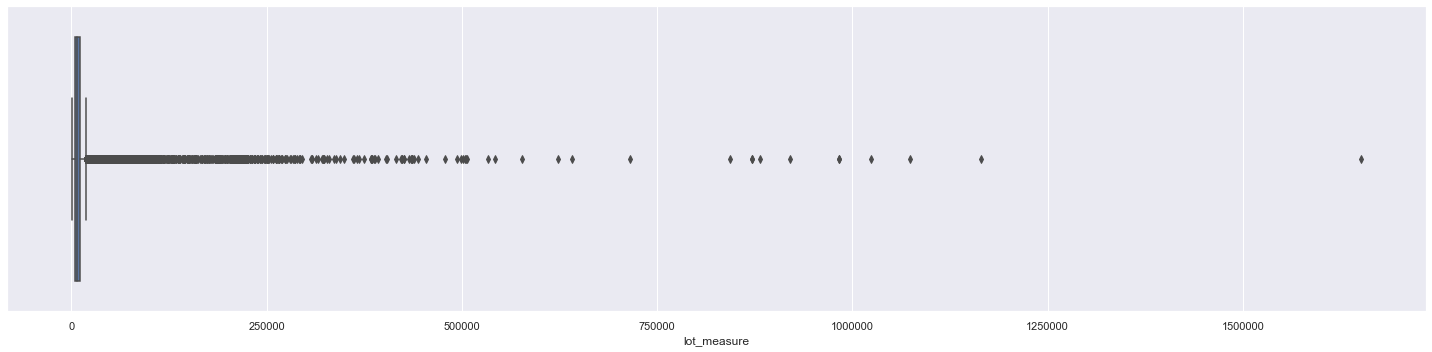

In [28]:
plt.figure(figsize=(20, 5))
sns.boxplot(df['lot_measure'])
plt.tight_layout()
plt.show()

43560 Square Feet makes 1 acre.
From the above pic, it is very clear that there are many Multi-acre properties. Such big lot house are not common family houses in a City. Hence excluding homes that are more than 10 Acres to start with.... 

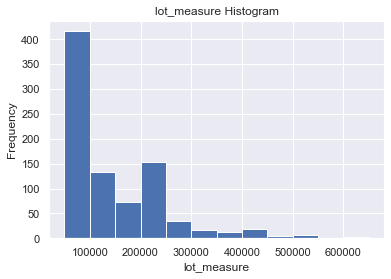

In [29]:
### plot 'price' histogram
bins = np.array([100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300]) * 500
plt.hist(x=df['lot_measure'],bins=bins)
#plt.hist(x=df['lot_measure'])
plt.xlabel('lot_measure')
plt.ylabel('Frequency')
plt.title('lot_measure Histogram')
plt.show()

The above distribution plot clearly highlights the abnormal sized houses. Dropping the houses that are > 43560 Sqft.

In [30]:
df.drop(df[df['lot_measure']>43560].index, inplace = True)

Rechecking after dropping the outliers

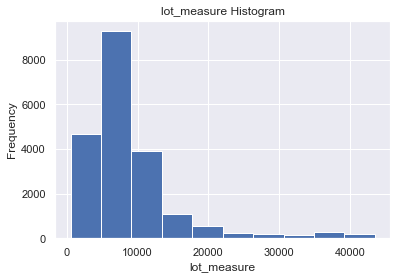

In [31]:
### plot 'price' histogram
plt.hist(x=df['lot_measure'])
#plt.hist(x=df['lot_measure'])
plt.xlabel('lot_measure')
plt.ylabel('Frequency')
plt.title('lot_measure Histogram')
plt.show()

### rechecking the statistics after dropping some of the observed anamolies. 

checking distribution of price

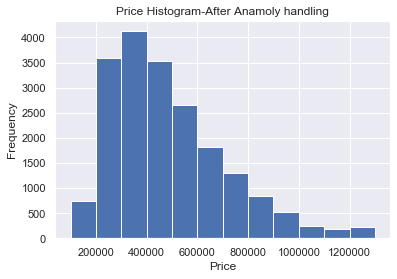

In [32]:
### plot 'price' histogram
bins = np.array([100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300]) * 1000
plt.hist(x=df['price'],bins=bins)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Price Histogram-After Anamoly handling')
plt.show()

In [33]:
X = df.drop(columns = ['price'],axis = 1)
y = df['price']

In [34]:
vif_data['VIF-post data fix']=[variance_inflation_factor(vif_cols.values,i)
                        for i in range(len(vif_cols.columns))]

In [35]:
x=vif_data['VIF-post data fix'].astype(str)

In [36]:
vif_data

,Feature,VIF,VIF-post data fix
0,room_bed,23.36,23.36
1,room_bath,28.80,28.80
2,living_measure,inf,inf
3,lot_measure,inf,inf
4,ceil,16.89,16.89
5,coast,1.21,1.21
6,sight,1.55,1.55
7,condition,34.75,34.75
8,quality,210.24,210.24
9,ceil_measure,inf,inf


In [37]:
#There is no change in the VIF Before and after. 

In [38]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,20555.00,533593.88,363659.88,75000.00,318500.00,445000.00,635000.00,7700000.00
room_bed,20555.00,3.37,0.91,0.00,3.00,3.00,4.00,11.00
room_bath,20555.00,2.10,0.76,0.00,1.50,2.25,2.50,8.00
living_measure,20555.00,2044.01,883.46,290.00,1410.00,1890.00,2506.00,12050.00
lot_measure,20555.00,8855.49,6811.74,520.00,5000.00,7416.00,10000.00,43560.00
ceil,20555.00,1.49,0.54,1.00,1.00,1.50,2.00,3.50
coast,20555.00,0.01,0.08,0.00,0.00,0.00,0.00,1.00
sight,20555.00,0.23,0.75,0.00,0.00,0.00,0.00,4.00
condition,20555.00,3.41,0.65,1.00,3.00,3.00,4.00,5.00
quality,20555.00,7.63,1.15,1.00,7.00,7.00,8.00,13.00


* price	20555.00	533593.88	363659.88	75000.00	318500.00	445000.00	635000.00	7700000.00  (AFTER)

* price	21613.00	540182.16	367362.23	75000.00	321950.00	450000.00	645000.00	7700000.00  (BEFORE)

* 20555.00	8855.49	 6811.74	520.00	5000.00	7416.00	10000.00	43560.00 (AFTER)
* 21613.00	15106.97 41420.51	520.00	5040.00	7618.00	10688.00	1651359.00 (BEFORE) 

In [39]:
### With all the input columns except cid and dayhours

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=6)

In [41]:
X.columns

Index(['room_bed', 'room_bath', 'living_measure', 'lot_measure', 'ceil',
       'coast', 'sight', 'condition', 'quality', 'ceil_measure', 'basement',
       'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'living_measure15', 'lot_measure15', 'furnished', 'total_area'],
      dtype='object')

**Model-1**
* Columns: All Columns except cid & day hours
* Standardization: None

m1_reg = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)

models, predictions = m1_reg.fit(X_train, X_test, y_train, y_test)
print(models)

**Model-2**
* Columns: All Columns except cid & day hours
* Standardization: StandardScaler

from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = MinMaxScaler().fit(X)
scaled_X = scaler.transform(X)

X_train_z, X_test_z, y_train_z, y_test_z = train_test_split(scaled_X, y, test_size = .3, random_state = 6)

X_train_z.shape

m2_reg_z = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)

modelsz, predictionsz = m2_reg_z.fit(X_train_z, X_test_z, y_train_z, y_test_z)
print(modelsz)

**Model-3**
* Columns: Reduced Features - 'price', 'room_bed', 'room_bath', 'living_measure', 'ceil', 'coast','sight', 'quality', 'ceil_measure', 'basement', 'lat','living_measure15', 'furnished'

* Standardization: None

* iteration 1: Same as model 3 but 'total_area' is not dropped, its retained in the model. 69%


* iteration 2: Same as model 3 but 'lot_measure' is not dropped, its retained in the model. 
'price', 'room_bed', 'room_bath', 'living_measure', 'lot_measure','ceil', 'coast', 'sight', 'quality', 'ceil_measure', 'basement','living_measure15', 'furnished' - 70%

* iteration 3: Same as model 3 but 'condition' is not dropped, its retained in the model. 
price', 'room_bed', 'room_bath', 'living_measure', 'ceil', 'coast','sight', 'condition', 'quality', 'ceil_measure', 'basement',
'living_measure15', 'furnished' - 70%

* iteration 4: Same as model 3 but 'lot_measure15' is not dropped, its retained in the model. 
price', 'room_bed', 'room_bath', 'living_measure', 'ceil', 'coast','sight', 'condition', 'quality', 'ceil_measure', 'basement',
'living_measure15', 'furnished' - 70%

* iteration 5: Same as model 3 but 'lat' is not dropped, its retained in the model. 
price', 'room_bed', 'room_bath', 'living_measure', 'ceil', 'coast','sight', 'condition', 'quality', 'ceil_measure', 'basement',
'living_measure15', 'furnished' - 83%


df_new = df.drop(columns=['zipcode','long', 'yr_built', 'yr_renovated',
                                       'lot_measure15', 'condition', 'lot_measure', 'total_area'], axis=1)
df_new.head()

df_new.columns

X2 = df_new.drop(columns = ['price'],axis = 1)
y2 = df_new['price']

X2.shape

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.30, random_state=6)

print(X2_train.shape)
print(X2_test.shape)
print(y2_train.shape)
print(y2_test.shape)

m5_reg_redfeat = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)

models_redfeat2, predictions_redfeat2 = m5_reg_redfeat.fit(X2_train, X2_test, y2_train, y2_test)

print(models_redfeat2)

**Model-4**
* Columns: Reduced Features
* Standardization: Std scalar

X2.shape

scaler_redfeat = MinMaxScaler().fit(X2)
scaled_X_redfeat = scaler_redfeat.transform(X2)

m4_reg_z_redfeat = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)

X_train_z_rf, X_test_z_rf, y_train_z_rf, y_test_z_rf = train_test_split(scaled_X_redfeat, y, test_size = .3, random_state = 6)


modelszredfeat, predictionszredfeat = m4_reg_z_redfeat.fit(X_train_z_rf, X_test_z_rf, y_train_z_rf, y_test_z_rf)
print(modelszredfeat)

X2.columns

### Based on the Baseline model - we see XGBRegressor is the BEST Model. We will have to experiment with different other ways to increase the model score further. 

Pipeline

In [47]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline 
from sklearn.decomposition import PCA
from xgboost import XGBRegressor

In [49]:
pipe_xgb = Pipeline([('scl', StandardScaler()), ('pca', PCA()), ('xgb', XGBRegressor())]) 

param_grid = {'pca__n_components':[18],'xgb__max_depth': np.arange(5, 9, 1), 'xgb__learning_rate': [0.1, 0.01], 'xgb__n_estimators':[100,200]} 

grid_xgb = GridSearchCV( pipe_xgb , param_grid = param_grid, cv = 5) 

grid_xgb.fit(X_train, y_train.values.ravel()) 
y_pred = np.around(grid_xgb.predict(X_test))
print({
    'model': 'XGB',
    "Best accuracy":"{:.0%}".format(grid_xgb.best_score_),
    'Best Params': grid_xgb.best_params_,
    'Test set accuracy': "{:.0%}".format(grid_xgb.score(X_test,y_test))
})

{'model': 'XGB', 'Best accuracy': '83%', 'Best Params': {'pca__n_components': 18, 'xgb__learning_rate': 0.1, 'xgb__max_depth': 7, 'xgb__n_estimators': 200}, 'Test set accuracy': '84%'}


In [51]:
pipe_xgb = Pipeline([('scl', StandardScaler()), ('xgb', XGBRegressor())]) 

param_grid = {'xgb__max_depth': np.arange(3, 9, 1), 'xgb__learning_rate': [1, 0.1, 0.01], 'xgb__n_estimators':np.arange(50, 300, 50)} 

grid_xgb = GridSearchCV( pipe_xgb , param_grid = param_grid, cv = 10) 

grid_xgb.fit(X_train, y_train.values.ravel()) 
y_pred = np.around(grid_xgb.predict(X_test))
print({
    'model': 'XGB',
    "Best accuracy":"{:.0%}".format(grid_xgb.best_score_),
    'Best Params': grid_xgb.best_params_,
    'Test set accuracy': "{:.0%}".format(grid_xgb.score(X_test,y_test))
})

{'model': 'XGB', 'Best accuracy': '90%', 'Best Params': {'xgb__learning_rate': 0.1, 'xgb__max_depth': 6, 'xgb__n_estimators': 250}, 'Test set accuracy': '89%'}


In [52]:
pipe_xgb = Pipeline([('scl', StandardScaler()), ('xgb', XGBRegressor())]) 

param_grid = {'xgb__max_depth': np.arange(5, 9, 1), 'xgb__learning_rate': [0.05, 0.1, 0.25, 0.5, 0.75, 1], 'xgb__n_estimators':np.arange(100, 300, 100)} 

grid_xgb = GridSearchCV( pipe_xgb , param_grid = param_grid, cv = 5) 

grid_xgb.fit(X_train, y_train.values.ravel()) 
y_pred = np.around(grid_xgb.predict(X_test))
print({
    'model': 'XGB',
    "Best accuracy":"{:.0%}".format(grid_xgb.best_score_),
    'Best Params': grid_xgb.best_params_,
    'Test set accuracy': "{:.0%}".format(grid_xgb.score(X_test,y_test))
})

{'model': 'XGB', 'Best accuracy': '90%', 'Best Params': {'xgb__learning_rate': 0.1, 'xgb__max_depth': 5, 'xgb__n_estimators': 200}, 'Test set accuracy': '90%'}


In [54]:
pipe_xgb = Pipeline([('scl', StandardScaler()), ('xgb', XGBRegressor())]) 

param_grid = {'xgb__max_depth': np.arange(5, 9, 1), 'xgb__learning_rate': np.arange(0.1, 1, 0.1), 'xgb__n_estimators':np.arange(100, 300, 100)} 

grid_xgb = GridSearchCV( pipe_xgb , param_grid = param_grid, cv = 5) 

grid_xgb.fit(X_train, y_train.values.ravel()) 
y_pred = np.around(grid_xgb.predict(X_test))
print({
    'model': 'XGB',
    "Best accuracy":"{:.0%}".format(grid_xgb.best_score_),
    'Best Params': grid_xgb.best_params_,
    'Test set accuracy': "{:.0%}".format(grid_xgb.score(X_test,y_test))
})

{'model': 'XGB', 'Best accuracy': '90%', 'Best Params': {'xgb__learning_rate': 0.1, 'xgb__max_depth': 5, 'xgb__n_estimators': 200}, 'Test set accuracy': '90%'}
